**Problem Statement**:

Assume our neuron receives as input the two dimensional data provided in "[c10p1.pickle](https://d18ky98rnyall9.cloudfront.net/_7bfd5defa66c4d019fdb4bd6af2a62b5_c10p1.pickle?Expires=1574035200&Signature=STFsKvowaC4Gt~Po5wdiJzj0-3uTmzwoJF9S52I9jCGGBLl4yNbngHGUmKv6OeoDk7gBNjXDfF~yz7CizRKnIoAwdmKP2ZSEuj77Iz5kGJS~O0Gg6OJwLbTf7MXeSbacwoMlWI0pqR~jkaO2BIwuYMX4S7wo35hxYa5-4EgIpkI_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)", but with the mean of the data subtracted from each data point (the mean of all xx values should be subtracted from every x value and the mean of all yy values should be subtracted from every yy value). You should perform this zero-mean centering step and then display the points again to verify that the data cloud is now centered around (0, 0)(0,0).

Implement the update rule derived in the previous question in Matlab or Octave. Let η=1, \alpha = 1α=1, and \Delta t = 0.01Δt=0.01. Start with a random vector as \textbf{w}_{0}w 
0
​	 . In each update iteration, feed in a data point \textbf{u} = (x, y)u=(x,y) from c10p1. If you've reached the last data point in c10p1, go back to the first one and repeat.

Typically, you would keep updating **w**w until the change in **w**w, given by norm (w(t+1) - w(t)), is negligibile (i.e., below an arbitrary small positive threshold), indicating that **w**w has converged. However, since you are implementing this as an online learning algorithm, you may prematurely detect convergence using this method. Instead, you may just run the algorithm for 100,000 iterations.

Run your code multiple times. Which of the following describes the behavior of **w**w and why does this happen?

Hint: Consider the eigenvectors of the correlation matrix of the mean-centered data. (The correlation matrix of a data matrix X, where rows indicate separate samples, is XTX/N, where NN is the number of samples. You can calculate its eigenvalues using eig().) If the data is mean-centered, the correlation matrix will be the same as the covariance matrix.

Using sample data to teach the neuron, using the Ojas iterative learning

In [22]:
import pickle
import numpy as np
from numpy import linalg
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

URL link to the pickled file containing 100 (x,y) 2D data points for neuron to learn. 
You can find the data at: http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html - Part III : Adaptation and Learning, under 'Representational learning'. This file is provided as part of the exercises from the Dayan and Abbott textbook recommended for the course.

In [23]:
URL = 'https://d18ky98rnyall9.cloudfront.net/_7bfd5defa66c4d019fdb4bd6af2a62b5_c10p1.pickle?Expires=1574035200&Signature=STFsKvowaC4Gt~Po5wdiJzj0-3uTmzwoJF9S52I9jCGGBLl4yNbngHGUmKv6OeoDk7gBNjXDfF~yz7CizRKnIoAwdmKP2ZSEuj77Iz5kGJS~O0Gg6OJwLbTf7MXeSbacwoMlWI0pqR~jkaO2BIwuYMX4S7wo35hxYa5-4EgIpkI_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'

In [24]:
from urllib.request import urlretrieve 
urlretrieve(URL, 'c10p1.pickle')

('c10p1.pickle', <http.client.HTTPMessage at 0x2673f509f98>)

Changing the path to the location (where the pickle data file is)

In [25]:
path = 'D:\Cogneurosci\Online Courses\Computational Neurosci\week-7\question7'

#unpickling, and loading the data
with open('c10p1.pickle', 'rb') as f:
    data = pickle.load(f)
    samples = data['c10p1']
    # samples = samples + (0.6,0.9)
    

In [26]:
#to see the (x,y) data points
print(samples)

[[ 1.2610673   0.08785084]
 [ 0.94870162 -0.01808508]
 [ 0.86185491  0.16224918]
 [ 0.95081336 -0.4325772 ]
 [ 1.3874176  -0.07707664]
 [ 1.4257554  -0.21140316]
 [ 1.0510257  -0.23929085]
 [ 0.8643021   0.20747363]
 [ 1.0557558  -0.0440909 ]
 [ 0.98515345 -0.45922628]
 [ 1.2154257   0.1351072 ]
 [ 1.2889587   0.22091317]
 [ 1.3419986  -0.12473362]
 [ 0.66064156  0.28451805]
 [ 1.2035246   0.80300324]
 [ 0.87489386  0.41143334]
 [ 1.3307248  -0.22338402]
 [ 0.9996517  -0.27229713]
 [ 0.80970832 -0.18176388]
 [ 1.1561395   0.31659399]
 [ 0.96945682 -0.01844687]
 [ 1.1501202   0.11455769]
 [ 0.89451168  0.39948466]
 [ 0.74866926  0.0062513 ]
 [ 1.4240451  -0.05110891]
 [ 0.95394331  0.35143469]
 [ 0.85480809 -0.14734469]
 [ 0.93359112 -0.09137605]
 [ 0.93737253  0.09293617]
 [ 0.77042668 -0.077022  ]
 [ 1.0234778  -0.29261726]
 [ 1.3611381   0.20925376]
 [ 0.65553227 -0.40112295]
 [ 0.91105658 -0.48095323]
 [ 1.1521568  -0.23549257]
 [ 0.86928331  0.04834487]
 [ 1.1996496   0.53552165]
 

[[0.29591088 0.00455223]
 [0.00455223 0.29629137]]
[0.29154493 0.30065732]
[[-0.72171865 -0.69218653]
 [ 0.69218653 -0.72171865]]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
Trained w: [1. 1.]
[1. 1.]
[-0.40678274  1.0435023 ]


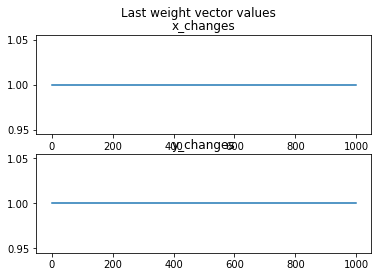

In [28]:
#computing the mean of the data; (axis=0, for column-wise averaging of the data)
    averaged = np.average(samples, axis=0)
# print(averaged)
    # samples = samples - averaged        ##subtracting mean from each sample point
# print(samples); to view the data being cenetered around zero after zero-centering step
    ##given data
    n=1.0
    alpha=1.0
    dt=0.01
    N=100000
    data_points = itertools.cycle(samples)  # sampleps = centered data

#initiating 'w0' to a random point inside a square centered on [0,0];
    np.random.seed(6)                   #ensure same solution instead of random
    w0 = np.matrix(np.random.rand(1 , 2)) # (1,2) are the dimensions of the returned array

#finding the eigenvectors, and eigenvalues of the correlation matrix of the mean-centered data:
    correlation_samples = np.divide(np.dot(np.transpose(samples), samples), np.size(samples)) #N - number of samples
    correlation_samples_eigenvalues, correlation_samples_eigenvectors = np.linalg.eig(correlation_samples) 
    print(correlation_samples)
    print(correlation_samples_eigenvalues)
    print(correlation_samples_eigenvectors)
#storing changes in the weight over time
    x_changes = []
    y_changes = []

    for i in range(N):
        u = np.asarray(next(data_points))
        v = u * w0.T
        
        #Oja's learning rule 
        w_new = w0 + (dt*n*(v*u - alpha*(v**2)*w0))
        # w_new = w0 + (dt*n*v*u) #(Hebb's learning rule)
        w_new = np.squeeze(np.asarray(w_new))
        
        #Recording the changes of weight with time
        x_changes.append(w_new[0])
        y_changes.append(w_new[1])
        #assigning the new weight to the old weight
        w0 = w_new.T
        # print(x_changes, y_changes)    
        if i > N-10:
            print('Trained w: %s' % (w0))
    print(w_new)
    print(v)
    # Print the last 1000 weight vectors
    nP = 1000
    fig, axs = plt.subplots(2, 1)
    fig.suptitle('Last weight vector values')
    axs[0].plot(range(nP), x_changes[-nP:])
    axs[0].set_title('x_changes')
    
    axs[1].plot(range(nP), y_changes[-nP:])
    axs[1].set_title('y_changes')
    plt.show()
    # # fig.savefig('%s_learning.png' % output_prefix, dpi=200)
    # plt.close(fig)